## ROBT 407 | Homework 2 | Task 0.4
#### Danissa Sandykbayeva

In [219]:
import numpy as np
from matplotlib import pyplot as plt
np.random.seed(25)
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

#### Task 1 <br>Generate a data set of size 100 as directed by the exercise, and plot the examples ${(x_n, y_n)}$ as well as the target function f on a plane. Be sure to mark the examples from different classes differently, and add labels to the axes of the plot. Generate a test set of size 1000 of the same nature. <br><br>Generating the data set of size N=100 with labels and d=2 as directed by the Exercise 3.2 of LFD, first the linearly-separable:

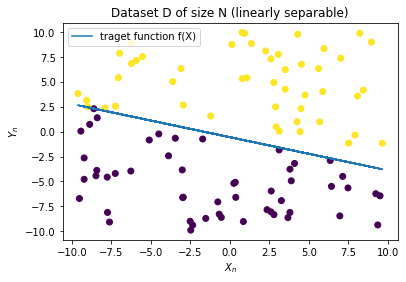

In [152]:
N=100
d=2
w=np.random.randint(1,10,d)
b=np.random.randint(1,10)
x=np.random.uniform(-1,1,(N,d))*10
y=np.zeros(N)
f=x.dot(w)+b
label=(f>0)*1
y=label
plt.scatter(x[:, 0], x[:, 1], c=label)
plt.plot(x[:,0],-w[0]*x[:,0]/w[1]-b/w[1],label='traget function f(X)')
plt.title('Dataset D of size N (linearly separable)')
plt.xlabel('$X_n$')
plt.ylabel('$Y_n$')
plt.legend()
plt.show()

#### Turning linearly separable dataset into non-lineraly separable one, by flipping random N/10 of the labels:

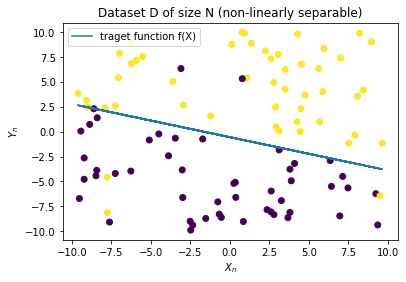

In [153]:
flips=np.random.randint(1,N,10)
for i in flips:
    if label[i]==1:
        label[i]=0
    else:
        label[i]=1
plt.scatter(x[:, 0], x[:, 1], c=label)
plt.plot(x[:,0],-w[0]*x[:,0]/w[1]-b/w[1],label='traget function f(X)')
plt.title('Dataset D of size N (non-linearly separable)')
plt.xlabel('$X_n$')
plt.ylabel('$Y_n$')
plt.legend()
plt.show()

#### Task 2 <br>Next, implement the pocket algorithm and run it on the data set for 1000 updates. Record $E_{in}(w(t))$, $E_{in}(\hat{w}(t))$, $E_{out}(w(t))$, and $E_{out}(\hat{w}(t))$ as functions of t (where $E_{out}$ is estimated by the test set). Repeat the experiment for 20 times. Plot the average $E_{in}(w(t))$ and $E_{in}(\hat{w}(t))$ as functions of t and briefly state your findings.<br><br>  Implementing Pocket Algorithm:

In [229]:
def pocket_pla(data,labels,t):
    # For recording of E_in values
    E_ins=np.zeros(t)
    E_ins_hat=np.zeros(t)
    T=range(0,1000)
    # Initializing weights to random floats in the range from 0.0 to 1.0 to start with
    W=[np.random.random() for i in range (2)]
    Wp=W
    # Value of the error for futures comparison with the error of the pocket weights
    E_in_old=0.0
    # Learning loop
    for n_tries in range (t):
        n_error=0
        # This error is purely to keep track of the performance of the hypothesis
        for i in range (N):
            if(np.sign(np.dot(data[i],W))!=labels[i]):
                # Changing current weights if an error in prediction is made
                W=W+np.dot(data[i],labels[i])
                n_error += 1
        E_in=n_error/N
        # At the first try we set E_in of the pocket weights to be equal to the error
        # of the first weight(w_0)
        if n_tries==0:
            E_in_old=E_in
        # All other consequtive times we change pocket weights to those that have smaller E_in value
        # and if new E_in is not smaller than that of the pocket weights do nothing
        else:
            if E_in<E_in_old:
                E_in_old=E_in
                Wp=W
        # Recording all E_in intro arrays in order to plot them later
        E_ins[n_tries]=E_in
        E_ins_hat[n_tries]=E_in_old
    plt.figure(num=None, figsize=(10, 2), dpi=80)
    plt.ylim(0, 1)
    plt.plot(T,E_ins,label='$E_{in}(w(t))$')
    plt.plot(T,E_ins_hat,label='$E_{in}(\hat{w}(t))$')
    plt.legend()
    plt.title('Change of $E_{in}(w(t))$ and $E_{in}(\hat{w}(t))$ vs. t')
    plt.ylabel('t')
    plt.xlabel('$E_{in}$')
    plt.show()
    print('Error of the final weights E_in(w(t)): %.3f' % E_in_old)
    print('Average of the E_in(w(t)): %.3f' % np.mean(E_ins))
    print('Average of the E_in(w(t)): %.3f' % np.mean(E_ins_hat))
    return Wp

#### Running a written previously algorithm on the generated dataset for 1000 iterations (t=1000):

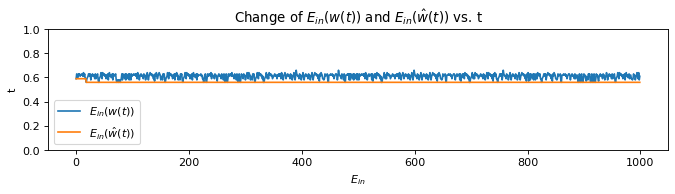

Error of the final weights E_in(w(t)): 0.560
Average of the E_in(w(t)): 0.611
Average of the E_in(w(t)): 0.561


In [230]:
weightss=pocket_pla(x,label,1000)

#### Plotting the results of Pocket algorithm approximation:

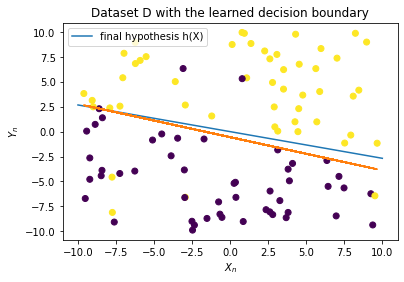

Final hypothesis: g(X) = -0.26766*X


In [231]:
x_hyperplane = np.linspace(-10,10)
slope = - weightss[0]/weightss[1]
y_hyperplane = slope * x_hyperplane
plt.plot(x_hyperplane, y_hyperplane, '-',label='final hypothesis h(X)')
plt.legend()
plt.scatter(x[:, 0], x[:, 1], c=label)
plt.plot(x[:,0],-w[0]*x[:,0]/w[1]-b/w[1],label='target function f(X)')
plt.title('Dataset D with the learned decision boundary')
plt.xlabel('$X_n$')
plt.ylabel('$Y_n$')
plt.show()
print('Final hypothesis: g(X) = %.5f*X' % slope)

#### Repeating the experiment 20 times:

**Experiment number 1**

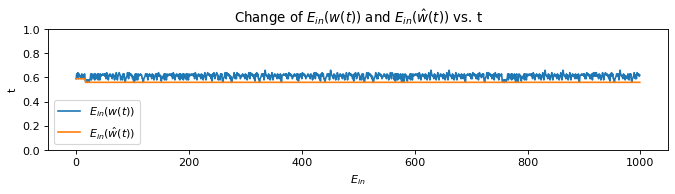

Error of the final weights E_in(w(t)): 0.560
Average of the E_in(w(t)): 0.611
Average of the E_in(w(t)): 0.561
Final hypothesis: g(X) = -0.28627*X


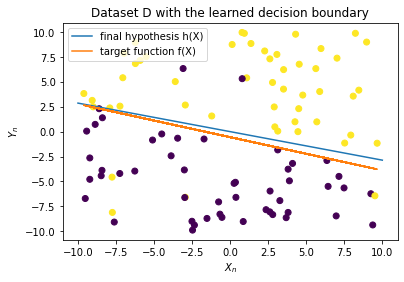

**Experiment number 2**

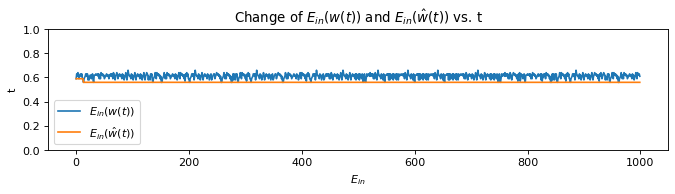

Error of the final weights E_in(w(t)): 0.560
Average of the E_in(w(t)): 0.612
Average of the E_in(w(t)): 0.560
Final hypothesis: g(X) = -0.27468*X


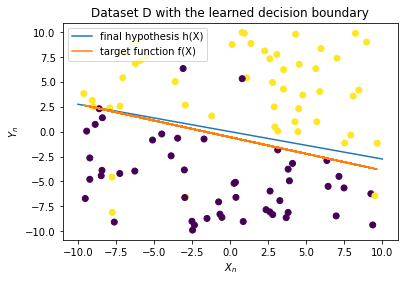

**Experiment number 3**

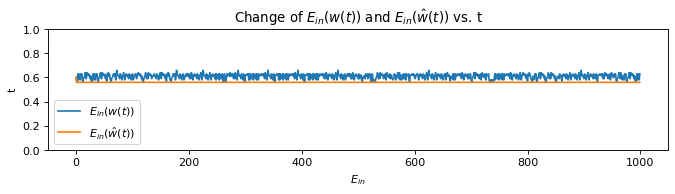

Error of the final weights E_in(w(t)): 0.560
Average of the E_in(w(t)): 0.610
Average of the E_in(w(t)): 0.560
Final hypothesis: g(X) = -0.26054*X


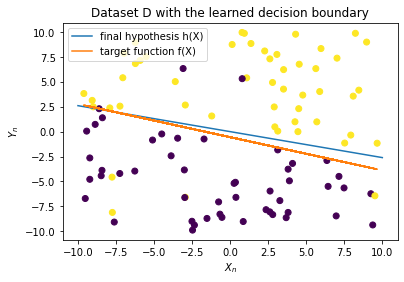

**Experiment number 4**

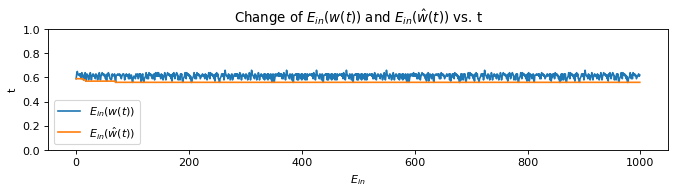

Error of the final weights E_in(w(t)): 0.560
Average of the E_in(w(t)): 0.612
Average of the E_in(w(t)): 0.561
Final hypothesis: g(X) = -0.27798*X


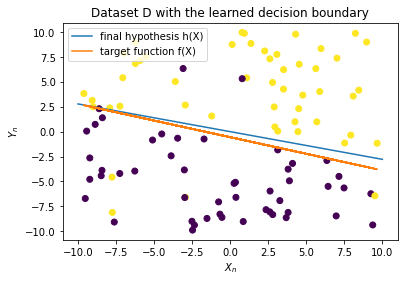

**Experiment number 5**

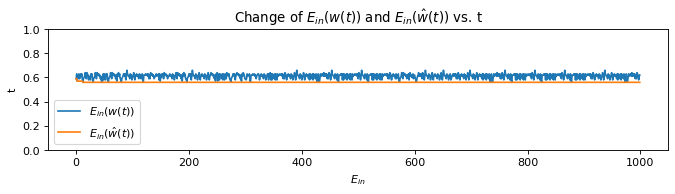

Error of the final weights E_in(w(t)): 0.560
Average of the E_in(w(t)): 0.612
Average of the E_in(w(t)): 0.560
Final hypothesis: g(X) = -0.28090*X


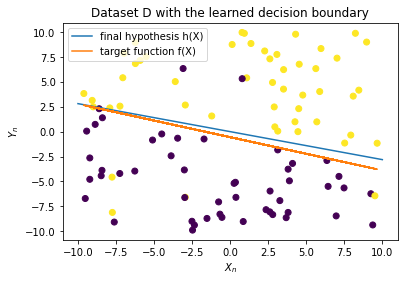

**Experiment number 6**

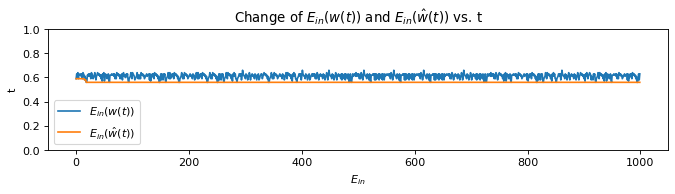

Error of the final weights E_in(w(t)): 0.560
Average of the E_in(w(t)): 0.611
Average of the E_in(w(t)): 0.561
Final hypothesis: g(X) = -0.28321*X


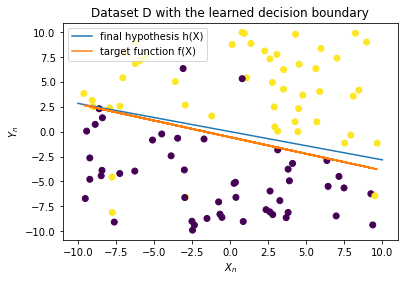

**Experiment number 7**

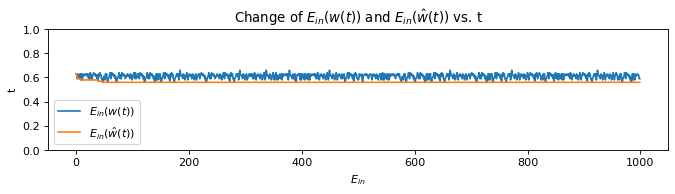

Error of the final weights E_in(w(t)): 0.560
Average of the E_in(w(t)): 0.611
Average of the E_in(w(t)): 0.561
Final hypothesis: g(X) = -0.25866*X


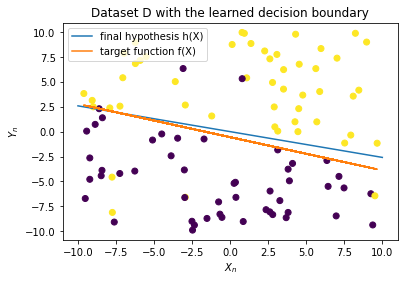

**Experiment number 8**

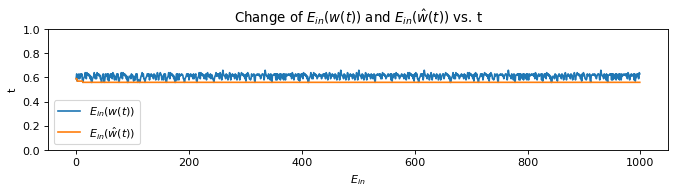

Error of the final weights E_in(w(t)): 0.560
Average of the E_in(w(t)): 0.611
Average of the E_in(w(t)): 0.560
Final hypothesis: g(X) = -0.28122*X


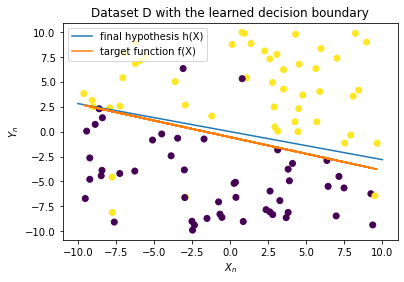

**Experiment number 9**

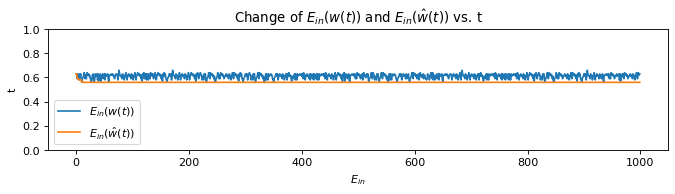

Error of the final weights E_in(w(t)): 0.560
Average of the E_in(w(t)): 0.611
Average of the E_in(w(t)): 0.560
Final hypothesis: g(X) = -0.26772*X


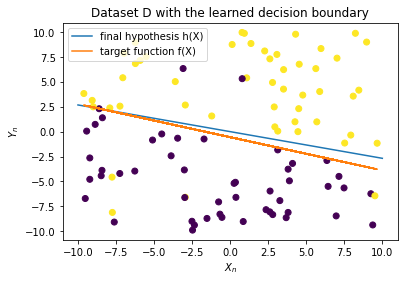

**Experiment number 10**

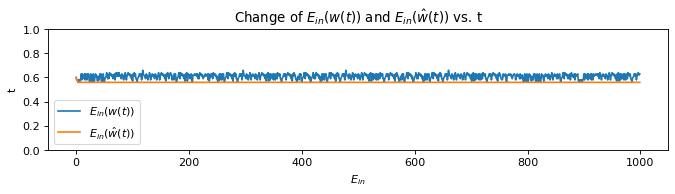

Error of the final weights E_in(w(t)): 0.560
Average of the E_in(w(t)): 0.609
Average of the E_in(w(t)): 0.560
Final hypothesis: g(X) = -0.29834*X


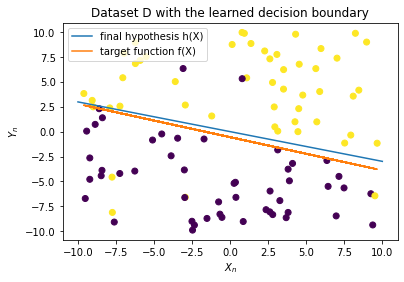

**Experiment number 11**

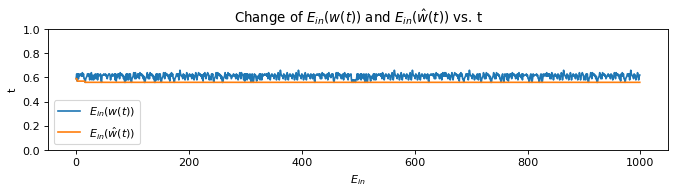

Error of the final weights E_in(w(t)): 0.560
Average of the E_in(w(t)): 0.610
Average of the E_in(w(t)): 0.560
Final hypothesis: g(X) = -0.27055*X


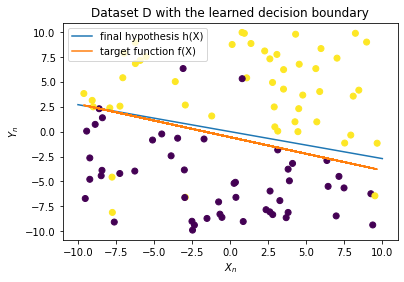

**Experiment number 12**

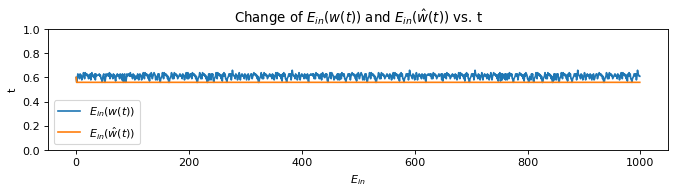

Error of the final weights E_in(w(t)): 0.560
Average of the E_in(w(t)): 0.611
Average of the E_in(w(t)): 0.560
Final hypothesis: g(X) = -0.28326*X


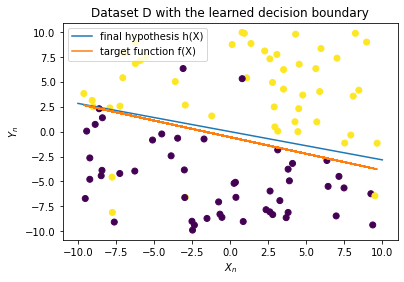

**Experiment number 13**

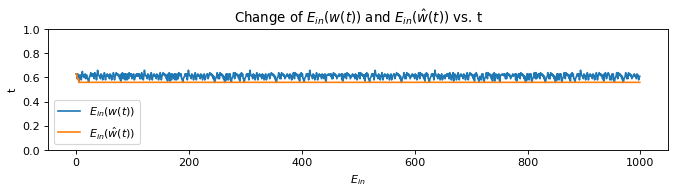

Error of the final weights E_in(w(t)): 0.560
Average of the E_in(w(t)): 0.611
Average of the E_in(w(t)): 0.560
Final hypothesis: g(X) = -0.27376*X


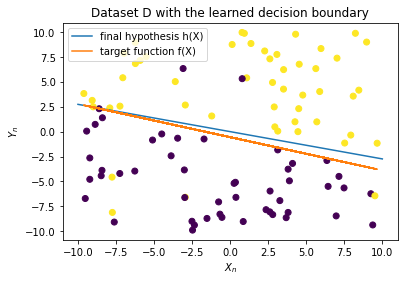

**Experiment number 14**

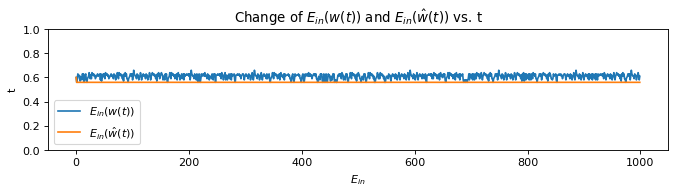

Error of the final weights E_in(w(t)): 0.560
Average of the E_in(w(t)): 0.610
Average of the E_in(w(t)): 0.560
Final hypothesis: g(X) = -0.27723*X


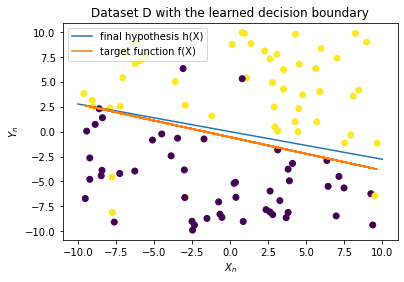

**Experiment number 15**

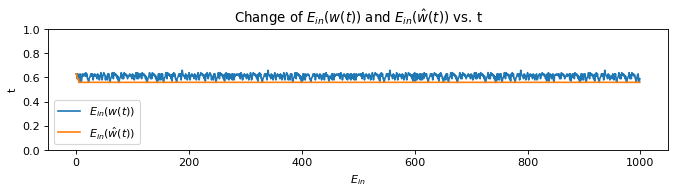

Error of the final weights E_in(w(t)): 0.560
Average of the E_in(w(t)): 0.610
Average of the E_in(w(t)): 0.560
Final hypothesis: g(X) = -0.26521*X


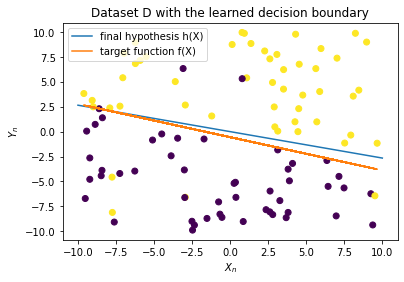

**Experiment number 16**

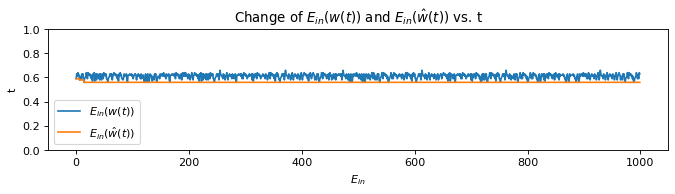

Error of the final weights E_in(w(t)): 0.560
Average of the E_in(w(t)): 0.611
Average of the E_in(w(t)): 0.560
Final hypothesis: g(X) = -0.28655*X


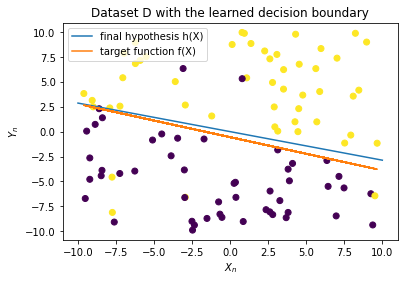

**Experiment number 17**

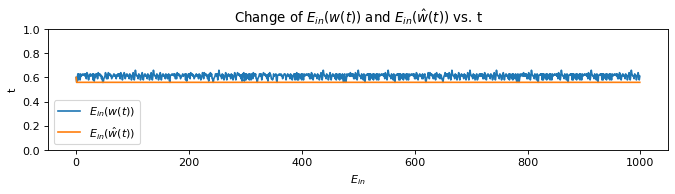

Error of the final weights E_in(w(t)): 0.560
Average of the E_in(w(t)): 0.612
Average of the E_in(w(t)): 0.560
Final hypothesis: g(X) = -0.27725*X


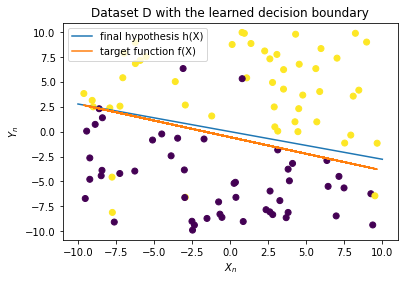

**Experiment number 18**

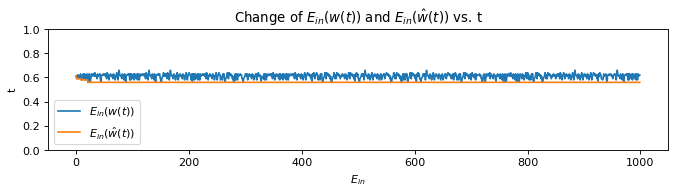

Error of the final weights E_in(w(t)): 0.560
Average of the E_in(w(t)): 0.611
Average of the E_in(w(t)): 0.561
Final hypothesis: g(X) = -0.26714*X


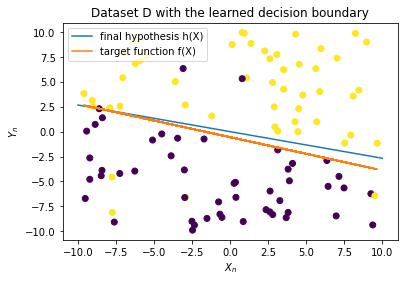

**Experiment number 19**

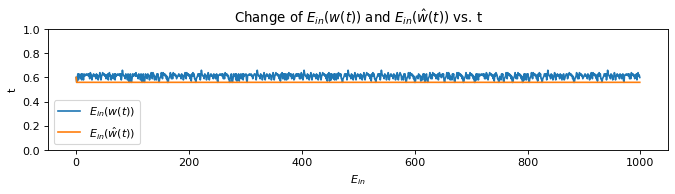

Error of the final weights E_in(w(t)): 0.560
Average of the E_in(w(t)): 0.611
Average of the E_in(w(t)): 0.560
Final hypothesis: g(X) = -0.26823*X


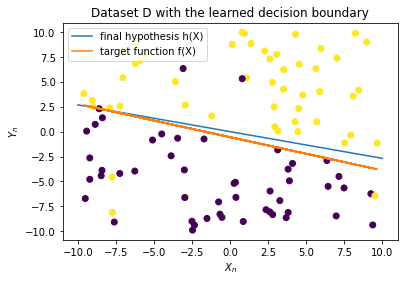

In [233]:
for i in range(1, 20):
    printmd("**Experiment number %d**" % i)
    weights2=pocket_pla(x,label,1000)
    x_hyperplane = np.linspace(-10,10)
    slope = - weights2[0]/weights2[1]
    y_hyperplane = slope * x_hyperplane
    plt.plot(x_hyperplane, y_hyperplane, '-',label='final hypothesis h(X)')
    plt.scatter(x[:, 0], x[:, 1], c=label)
    plt.plot(x[:,0],-w[0]*x[:,0]/w[1]-b/w[1],label='target function f(X)')
    plt.title('Dataset D with the learned decision boundary')
    plt.legend()
    plt.xlabel('$X_n$')
    plt.ylabel('$Y_n$')
    print('Final hypothesis: g(X) = %.5f*X' % slope)
    plt.show()

#### As it can be seen from the plots and data above, $E_{in}[w(t)]$ reaches it's average value quite fast and later just oscilates around it with each new iteration. And $E_{in}[\hat{w}(t)]$ also reaches it's minimum really fast. Besides that it can also be seen that Pocket Algorithm does a pretty goot job at approximating the target function and separating non-lineraly separable data with as less outliers as possible.<br><br>Also since there is only 10% of all points with the flipped labels (meaning that created noise is relatively insignificant) hypotheses of all 20 repotitions look very similar to each other.